## Autograd

out = 1/6 Tong{2*(a + 2)^2} 

In [1]:
import torch
a = torch.tensor([[1, 2, 3],[4, 5, 6]], requires_grad=True, dtype=torch.float)
b = a + 2
c = 2 * b * b
out = c.mean()
out.backward()
# derivative
print(a.grad)

tensor([[2.0000, 2.6667, 3.3333],
        [4.0000, 4.6667, 5.3333]])


In [2]:
# using torch.no_grad to save memory
print(a.requires_grad)
with torch.no_grad():
    print((a**2).requires_grad)

True
False


### Stop tracking 

In [3]:
print(a.detach().requires_grad)

False


In [5]:
a = torch.ones((2,3), requires_grad=True)
b = a + 2
c = 2*b*b
out = c.mean()
out.backward(retain_graph=True)
print(a.grad)
out.backward()
# add gradients ones already stored in a.grad
print(a.grad)

tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[4., 4., 4.],
        [4., 4., 4.]])


## Linear regression

In [14]:
import torch
import torch.nn as nn
class LinearModel(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_dim, out_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out
model = LinearModel(1, 1)

In [15]:
learnRate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr=learnRate)
criterion = nn.MSELoss()

In [11]:
x_train = torch.tensor([1,2,3,4,5,6,7,8,9,10], dtype=torch.float).reshape(-1,1)
y_train = torch.tensor([3*x+5 for x in x_train]).reshape(-1, 1)

In [16]:
epochs = 1000
for epoch in range(epochs):
    epoch += 1
    inputs = x_train
    labels = y_train
    out = model(inputs)
    optimiser.zero_grad()
    loss = criterion(out, labels)
    loss.backward()
    optimiser.step()
    predicted = model.forward(x_train)
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 641.9002075195312
epoch 2, loss 31.983272552490234
epoch 3, loss 3.9781627655029297
epoch 4, loss 2.6722054481506348
epoch 5, loss 2.5914194583892822
epoch 6, loss 2.5670206546783447
epoch 7, loss 2.545382022857666
epoch 8, loss 2.5240418910980225
epoch 9, loss 2.502887010574341
epoch 10, loss 2.4819085597991943
epoch 11, loss 2.4611072540283203
epoch 12, loss 2.4404799938201904
epoch 13, loss 2.4200263023376465
epoch 14, loss 2.3997418880462646
epoch 15, loss 2.3796277046203613
epoch 16, loss 2.359682321548462
epoch 17, loss 2.339905023574829
epoch 18, loss 2.32029390335083
epoch 19, loss 2.3008456230163574
epoch 20, loss 2.2815613746643066
epoch 21, loss 2.2624382972717285
epoch 22, loss 2.243475914001465
epoch 23, loss 2.22467303276062
epoch 24, loss 2.2060272693634033
epoch 25, loss 2.187537908554077
epoch 26, loss 2.1692020893096924
epoch 27, loss 2.1510214805603027
epoch 28, loss 2.132993459701538
epoch 29, loss 2.1151156425476074
epoch 30, loss 2.0973875522613525
e

epoch 608, loss 0.016176264733076096
epoch 609, loss 0.016040634363889694
epoch 610, loss 0.015906307846307755
epoch 611, loss 0.015772998332977295
epoch 612, loss 0.01564083993434906
epoch 613, loss 0.01550973393023014
epoch 614, loss 0.015379808843135834
epoch 615, loss 0.015250898897647858
epoch 616, loss 0.015123073942959309
epoch 617, loss 0.014996372163295746
epoch 618, loss 0.014870541170239449
epoch 619, loss 0.014745938591659069
epoch 620, loss 0.014622439630329609
epoch 621, loss 0.01449989341199398
epoch 622, loss 0.014378231950104237
epoch 623, loss 0.014257836155593395
epoch 624, loss 0.014138340950012207
epoch 625, loss 0.014019748196005821
epoch 626, loss 0.013902274891734123
epoch 627, loss 0.013785715214908123
epoch 628, loss 0.013670091517269611
epoch 629, loss 0.013555636629462242
epoch 630, loss 0.013442079536616802
epoch 631, loss 0.013329343870282173
epoch 632, loss 0.013217640109360218
epoch 633, loss 0.01310683786869049
epoch 634, loss 0.012997071258723736
epoch

In [17]:
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[3.0075]])), ('linear.bias', tensor([4.9474]))])


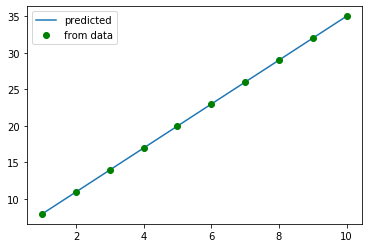

In [19]:
import matplotlib.pyplot as plt
x = x_train.detach().numpy()
plt.plot(x, predicted.detach().numpy(), label = 'predicted')
plt.plot(x, y_train.detach().numpy(),'go', label='from data')
plt.legend()
plt.show()

## Save models

In [20]:
torch.save(model.state_dict(), 'testmodel.pkl')

In [21]:
# restore model
model = LinearModel(1, 1)
model.load_state_dict(torch.load('testmodel.pkl'))

<All keys matched successfully>